2021-10-15 13:14:34.281 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


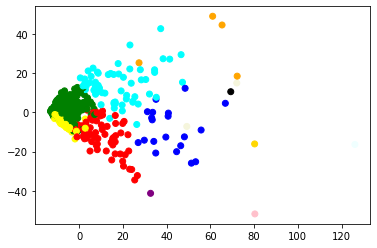

Dalmatians (1996) non présent dans la base
Cloverfield Lane (2016) non présent dans la base
Film :  Armed and Dangerous (1986) note obtenue :  0.6304929770298615
Film :  Bird on a Wire (1990) note obtenue :  0.5763092958534866
Film :  Arthur (1981) note obtenue :  0.4850860943228171
Film :  'burbs, The (1989) note obtenue :  0.4637759339596515
Film :  40 Days and 40 Nights (2002) note obtenue :  0.43498864731473225
Film :  Bachelor, The (1999) note obtenue :  0.4014570969642767


In [79]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import IncrementalPCA
import streamlit as st

list_films=["Dalmatians (1996)","Cloverfield Lane (2016)","Fools Rush In (1997)","Red Sonja (1985)","Red Rock West (1992)"]
list_notes=["3","3","5","4","4"]
df_merged = pd.read_csv('df_merged.csv')
df_table = df_merged.pivot_table(index='userId', columns='title', values='rating')
# Keep only movies that had at least 8 ratings
df_table.head(15)
df_table.loc[-1] =df_table.iloc[1]   # adding a row
df_table[-1]=0
"""
print("donner moi un premier film")
x1= input('le film 1: ')
print("le  film est:",x1)
y1= input('la note 1:')
print("la  note du film est:",y1)
print("donner moi un deuxieme film")
x2= input('le film 2 : ')
print("le  film est:",x2)
y2= input('la note 2:')
print("la  note du film est:",y2)
print("donner moi un troisieme film")
x3= input('le film 3 : ')
print("le  film est:",x3)
y3= input('la note 3:')
print("la  note du film est:",y3)
print("donner moi un quatrieme film")
x4= input('le film 4 : ')
print("le  film est:",x4)
y4= input('la note 4:')
print("la  note du film est:",y4)
print("donner moi un cinquieme film")
x5 =input('le film 5 : ')
print("le  film est:",x5)
y5= input('la note 4:')
print("la  note du film est:",y5)
"""
#list_films=[x1,x2,x3,x4,x5]
#list_notes=[y1,y2,y3,y4,y5]
dico_user={}
for i in range(len(list_films)):
  for j in range(len(list_notes)):
    if i==j:
      df_table.at[-1,list_films[i]]=list_notes[j]
      dico_user[list_films[i]]=list_notes[j]
df_table=df_table.fillna(0)
kmeans = KMeans(n_clusters=12, random_state=100).fit(df_table)
df_table["cluster"] = kmeans.labels_
st.write("visualisation trop dificile")
pca = PCA()
df_pca=pca.fit_transform(df_table)
kmeans.labels_

ipca = IncrementalPCA(n_components=2, batch_size=10)
ipca.fit(df_table)
X_red=ipca.transform(df_table) # doctest: +SKIP
centers = kmeans.cluster_centers_
colors=["red", "blue","green", "orange","purple",'gold','beige', 'black','cyan','yellow','pink','azure']
c=list(df_table["cluster"])
cc = [colors[i] for i in c]
plt.scatter(X_red[:,0], X_red[:,1], c=cc)
plt.show()



df_similarity = pd.read_csv('movie_similarity.csv')
df_similarity.fillna(0,inplace=True)

sim_movies,notes=[],[]
dico_results={}
for i in range(len(list_films)):
    test=list_films[i]
    try:
        similar_index=list(df_similarity[test].sort_values(ascending=False).index)
        note=list(df_similarity[test].sort_values(ascending=False).values)
        notes.extend(note)
        for elem in similar_index:
            sim_movies.append(df_similarity.loc[elem,"title"])
    except KeyError:
        print("{} non présent dans la base".format(test))


notes2=sorted(notes)[::-1]
for elem in range(6):
    note=notes2[elem]
    print("Film : ", sim_movies[notes.index(note)], "note obtenue : ",notes2[elem])
